In [71]:
import matplotlib.pyplot as plt
import numpy as np
from pygco import cut_simple, cut_from_graph
import os
from PIL import Image
import glob
from sklearn import metrics
#import matplotlib as mplt
from matplotlib import cm


In [72]:
def convert_to_colour(input_array):
    '''Converts array in image with oct colour code

    :param double input_array: array of image pixels
    :retrun: image with oct colour code
    :rtye: PIL image
    '''
    im = Image.fromarray(np.uint8(cm.rainbow(input_array)*255))
    x,y = im.size
    im_index = im.load()
    label_new = []
    for i in xrange(x):
        for j in xrange(y):
            rgb =  (im_index[j,i][0],im_index[j,i][1],im_index[j,i][2])
            label_new.append(get_label_from_rgb_em(rgb))
    im_new = Image.new('RGB',size)
    im_new.putdata(label_new)
    return im_new


def vectorized_result(j,num_label):
    '''Convert number to 1-hot-encoding vector
    
    :param int j: label
    :param int num_label: number of classes determining length of vector
    :return: num_label-dimensional unit vector with a 1.0 in the jth
    :rtype: int
    '''
    e = np.zeros((num_label, 1))
    e[int(j)] = 1
    return e


def smoothing_oct(unaries):
    '''Apply energy minimization from http://peekaboo-vision.blogspot.com.au/2012/05/graphcuts-for-python-pygco.html

    :param int unaries: array of labels
    :return: smoothend labels
    :rtype: int
    '''
    label_num = unaries.shape[2]
    x = np.argmin(unaries, axis=2)
    pott_potential = -1000 * np.eye(label_num, dtype=np.int32)
    return cut_simple(unaries, pott_potential)

    
def apply_em(pic_prediction_cnn):
    '''Smoothening image applying energy minimization

    :param PIL image pic_prediction: image with prediction from cnn
    :return: smoothened image
    :rtype: PIL image
    '''
    print("Applying energy minimization")
    size = pic_prediction_cnn.size
    labels_cnn = np.asarray(pic_prediction_cnn).reshape(-1,3)
    labels_cnn = [vectorized_result(get_label_from_rgb(labels_cnn[i]),7) for i in xrange(len(labels_cnn))]
    labels_cnn = np.asarray(labels_cnn)
    labels_cnn = (labels_cnn.reshape(int(size[0]),int(size[1]),7)*(-100)).astype(np.int32)
    return convert_to_colour(smoothing_oct(labels_cnn))

def get_label_from_rgb_em(pixel):
    '''Convert RGB pixel to label

    outside = red = (255,0,0) = 0
    lumen = yellow = (255,255,0) = 1
    inside = green = (0,255,0) = 2
    catheder shadow = blue = (0,0,255) = 3
    artery wall = turquise = (0,255,255) = 4 
    stent = pink = (255,0,255) = 5
    
    :param int pixel: tuple of RGB value of pixel
    :return: label representing a class described above
    :rtype: int
    '''
    pixel = tuple(pixel)
    rgb2label = {(115, 18, 254):(0,0,0), (127, 0, 255):(255,0,0), (123, 6, 254):(0,255,0), 
                    (119, 12, 254):(0,255,255), (125, 3, 254):(255,255,0), 
                    (117, 15, 254):(255,0,255), (121, 9, 254):(0,0,255)}
    return rgb2label[pixel]

In [73]:
cwd_eval = '/Users/jbaldauf/Documents/Tensorflow/OCT-project/Data/first_results/'
pic_prediction_cnn = Image.open(cwd_eval + '1Image036_zoom.png')

Applying energy minimization


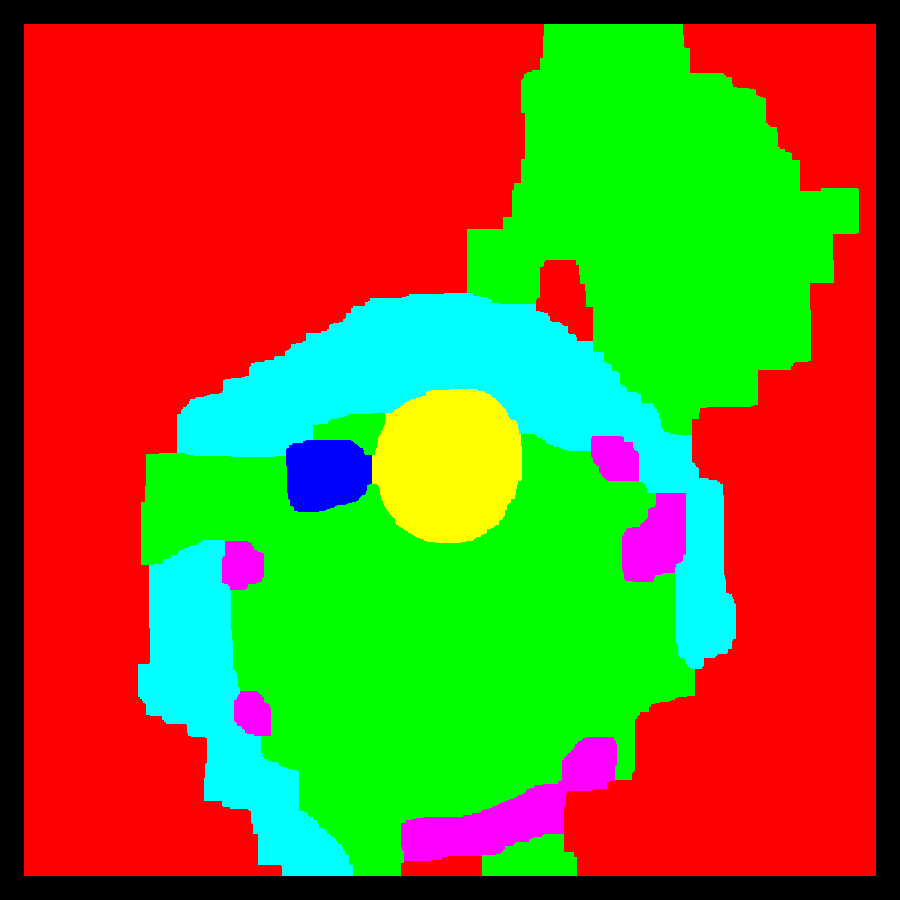

In [79]:
test = apply_em(pic_prediction_cnn)
test